In [8]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import tree
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# read the data in
df = pd.read_csv("diabetes.csv")
X = df.drop(labels='Outcome',axis=1)# independent variables
y = df['Outcome'].values# dependent variables

# Normalize Data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

=========================================================================================================================
In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.<br>

<h1>Cross-validation:</h1>
It is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>

The three steps involved in cross-validation are as follows :<br>
    Reserve some portion of sample data-set.<br>
    Using the rest data-set train the model.<br>
    Test the model using the reserve portion of the data-set.<br>

<h2>Methods of Cross Validation</h2>

<h3>1) Train Test Split</h3>
In this method, we perform training on the 70% of the given data-set and rest 30% is used for the testing purpose. The major drawback of this method is that we perform training on the 70% of the dataset, it may possible that the remaining 30% of the data contains some important information which we are leaving while training our model i.e higher bias. <br>

In [9]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)

# build a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=2017)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print ("Train Test Split predictions(first ten): ", pred[:10])
print ("Train Test Split Accuracy Score ", accuracy_score(pred, y_test))

Train Test Split predictions(first ten):  [0 1 1 1 1 0 0 0 0 0]
Train Test Split Accuracy Score  0.696969696969697


<h3>2) LOOCV (Leave One Out Cross Validation)</h3>
In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also.
An advantage of using this method is that we make use of all data points and hence it is low bias.
The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.<br>

<h3>3) K-Fold Cross Validation</h3>
In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.<br>

<i>It is always suggested that the value of k should be 10 as the lower value of k is takes towards validation and higher value of k leads to LOOCV method.</i>

<b>Example</b><br>
The diagram below shows an example of the training subsets and evaluation subsets generated in k-fold cross-validation. Here, we have total 25 instances. In first iteration we use the first 20 percent of data for evaluation, and the remaining 80 percent for training([1-5] testing and [5-25] training) while in the second iteration we use the second subset of 20 percent for evaluation, and the remaining three subsets of the data for training([5-10] testing and [1-5 and 10-25] training), and so on.
<br>
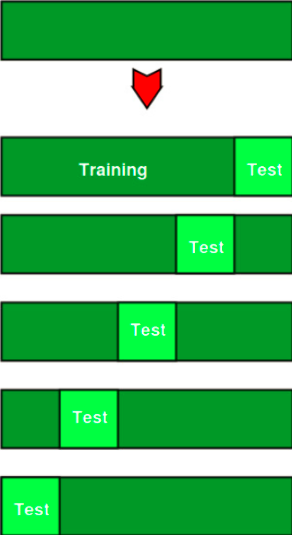


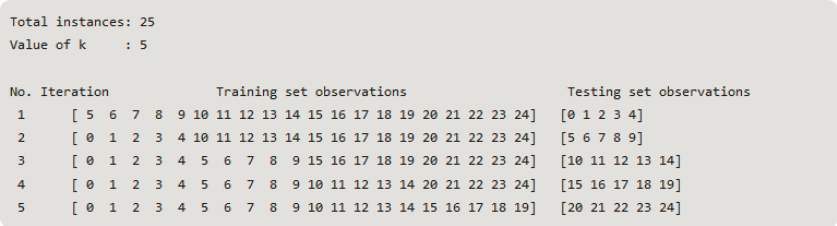

<h3>Comparison of train/test split to cross-validation</h3>

<b>Advantages of train/test split:</b>
<ol>
    <li>This runs K times faster than Leave One Out cross-validation because K-fold cross-validation repeats the train/test split K-times.</li>
    <li>Simpler to examine the detailed results of the testing process.<li>
</ol>

<b>Advantages of cross-validation:</b>
<ol>
    <li>More accurate estimate of out-of-sample accuracy.</li>
    <li>More “efficient” use of data as every observation is used for both training and testing.</li>
</ol>

In [10]:
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print ("Fold AUC Scores: ", scores)
print ("CV AUC Score: ", scores.mean())

# evaluate the model using 10-fold cross-validation
# train_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
# test_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=10)

# print ("Train Fold AUC Scores: ", train_scores)
# print ("Train CV AUC Score: ", train_scores.mean())

# print ("\nTest Fold AUC Scores: ", test_scores)
# print ("Test CV AUC Score: ", test_scores.mean())

Fold AUC Scores:  [0.62337662 0.74025974 0.7012987  0.57142857 0.66233766 0.72727273
 0.83116883 0.77922078 0.63157895 0.73684211]
CV AUC Score:  0.7004784688995216


<h2>4) Stratified cross-validation</h2>
Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class. This approach ensures that one class of data is not overrepresented especially when the target variable is unbalanced.<br>

For example in a binary classification problem where we want to predict if a passenger on Titanic survived or not. we have two classes here Passenger either survived or did not survive. We ensure that each fold has a percentage of passengers that survived and a percentage of passengers that did not survive.<br>
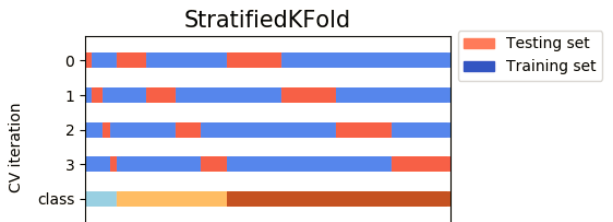

In [11]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019)
train_scores = []
test_scores = []
k = 0

for (train, test) in kfold.split(X_train, y_train):
    clf.fit(X_train[train], y_train[train])    
    train_score = clf.score(X_train[train], y_train[train])
    train_scores.append(train_score)
    
    # score for test set    
    test_score = clf.score(X_train[test], y_train[test])
    test_scores.append(test_score)
    
    k += 1
    
    print('Fold: %s, Class dist.: %s, Train Acc: %.3f, Test Acc: %.3f'% (k, np.bincount(y_train[train]), train_score, test_score))
    
    print('\nTrain CV accuracy: %.3f' % (np.mean(train_scores)))
    print('Test CV accuracy: %.3f' % (np.mean(test_scores)))

Fold: 1, Class dist.: [277 152], Train Acc: 1.000, Test Acc: 0.704

Train CV accuracy: 1.000
Test CV accuracy: 0.704
Fold: 2, Class dist.: [277 152], Train Acc: 1.000, Test Acc: 0.639

Train CV accuracy: 1.000
Test CV accuracy: 0.671
Fold: 3, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.645

Train CV accuracy: 1.000
Test CV accuracy: 0.662
Fold: 4, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.664

Train CV accuracy: 1.000
Test CV accuracy: 0.663
Fold: 5, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.701

Train CV accuracy: 1.000
Test CV accuracy: 0.670


D:\Installed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
